
#Introduction
Web scraping is method to obtain large amounts of data from websites. Most of this data is unstructured data in an HTML format which is then converted into structured data in a spreadsheet or a database so that it can be used in various applications. There are many different ways to perform web scraping to obtain data from websites. These include using online services also
Coming to dataset list includes both countries and dependent territories. Data based on the latest United Nations Population Division estimates. country for current estimates (live population clock), historical data, and projected figures. See also: World Population


# Attribute information:
* Country — Name of Country
*Population — Population of Country in a given year
*Median Age — Median age of the population
*Fertility Rate — Fertility rate (in %)
*Density (P/Km²) — Density of country
*Urban Pop %- Percentage of urban population
*Yearly Change - Percentage Yearly Change in Population
*Net Change - Net Change in Population
*Land Area (Km²) - Land area of countries / dependent territories.
*World share — World share

# Part 1

# Importing necessary libraries

In [56]:
import numpy as np                             # To perform wide variety of mathematical operations on arrays.
import requests                                # it make http requests using python.
from bs4 import BeautifulSoup                  # getting data out of html,xml.
import pandas as pd                            # which is used to data cleaning, processing and analysis.
import missingno as mns                        # Identifying the missing data within the dataframe
import seaborn as sns                          # Making the statistical graphics.
import matplotlib.pyplot as plt                # Data visualization and graphical plotting.
import re

# Chechking the connection/Responce status

In [57]:
URL = "https://www.worldometers.info/world-population/population-by-country/"
html = requests.get(URL)                            # Using the requests library geting the server connection
print(html)

<Response [200]>


# Extracting the data/tables from the desired URL

## By using  BeautifulSoup library

In [ ]:
URL = "https://www.worldometers.info/world-population/population-by-country/"
page = requests.get(URL)                            # Extracting the data from the above URL 
soup = BeautifulSoup(page.text,'lxml')              # extracting text from the web using BeautifulSoup library
soup

In [59]:
table = soup.find('table',{'id':'example2'})        # identifying the table in the html and assigning it inti variable

headers = []                                        # storing all the heares in the list

for i in table.find_all("th"):                      # using for loop to fetch the headers of the table
        title = i.text.strip()                      # extracting text and strinpping the blank spaces if any 
        headers.append(title)                       # appending the all headres columns 

df1 = pd.DataFrame(columns = headers)               # creating a data frame and storing thr headers data into columns

for row in table.find_all('tr')[1:]:                # using for loop to fetch the rows of the table
          data = row.find_all('td')                 # storing all the row data into a variable
          row_data = [td.text.strip() for td in data] # extracting text and strinpping the blank spaces using for loop
          length = len(df1)                         # defining length of the dataframe
          df1.loc[length] = row_data                # retriving data values from a dataset fitted in the paticular row or column
           


In [60]:
df1

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,233,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


## By using pandas Library

In [ ]:
URL = "https://www.worldometers.info/world-population/population-by-country/"
html = requests.get(URL).content                    # Extracting the data from the above URL  
df_list= pd.read_html(html)                         # Reading the data by using the pandas
df = df_list                                        # assigning the extracted data
print(df)

In [62]:
len(df)                                             # cheching the number of tables in the above website

1

In [63]:
df[0]                                               # from index (0) printing the table

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [ ]:
df[0].to_csv('webtable.csv')                      # Saving the extracted data into csv file

In [111]:
df3.info()                                      # data extracted by using pandas library and chechking it dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Countries             235 non-null    object 
 1   Population (2020)     235 non-null    int64  
 2   Yearly change in %    235 non-null    float64
 3   Increased population  235 non-null    int64  
 4   Density (people/Km²)  235 non-null    int64  
 5   Land Area (Km²)       235 non-null    int64  
 6   Migrants (net)        201 non-null    float64
 7   Fertility Rate        201 non-null    float64
 8   Median Age            201 non-null    float64
 9   Urban Pop %           222 non-null    float64
 10  World Share           235 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 20.3+ KB


# Reporting the number of rows and columns in the scrapped table

In [65]:
df[0].shape                                       # by using shape function checking rows and columns

(235, 12)

# Reporting if there is any missing value in the dataset.

In [146]:
df[0].isnull().sum()                            # checking for null/missing values

Countries                0
Population (2020)        0
Yearly change in %       0
Increased population     0
Density (people/Km²)     0
Land Area (Km²)          0
Migrants (net)          34
Fertility Rate           0
Median Age               0
Urban Pop %              0
World Share              0
dtype: int64

In [67]:
df[0].columns                                     # checking the columns

Index(['#', 'Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [68]:
df[0].drop('#',axis = 1, inplace = True)          # Droping the unnecessary columns 

In [69]:
df[0].head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [18]:
df1['Population (2020)'] = df1['Population (2020)'].str.replace(',','').astype(float)         # correcting the required columns data types

In [47]:
df1['Yearly Change'] = df1['Yearly Change'].str.replace('%','').astype(float)       # correcting the required columns data types

In [48]:
df1['Net Change'] = df1['Net Change'].str.replace(',','').astype(float)   # correcting the required columns data types

In [49]:
df1['Density (P/Km²)'] = df1['Density (P/Km²)'].str.replace(',','').astype(float)   # correcting the required columns data types

In [27]:
df1['Land Area (Km²)'] = df1['Land Area (Km²)'].str.replace(',','').astype(float)             # correcting the required columns data types

In [50]:
df1['Migrants (net)'] = df1['Migrants (net)'].replace('-',',','', regex = True).astype(float)     # correcting the required columns data types

ValueError: ignored

In [29]:
df1['World Share'] = df1['World Share'].str.replace('%','',regex = True).astype(float)        # correcting the required columns data types

In [70]:
df[0]['World Share'] = df[0]['World Share'].str.replace('%','',regex = True).astype(float)        # correcting the required columns data types

In [93]:
df[0]['Yearly change in %'] = df[0]['Yearly change in %'].str.replace('%','',regex = True).astype(float)        # correcting the required columns data types

In [106]:
df3['Fertility Rate'] = df3['Fertility Rate'].str.replace('.','',regex = True).astype(float)        # correcting the required columns data types

# Renaming the columns appropriately.

In [71]:
df[0].rename(columns = {'Country (or dependency)':'Countries',
                      'Yearly Change':'Yearly change in %',
                      'Net Change':'Increased population',
                      'Density (P/Km²)':'Density (people/Km²)',
                      'Fert. Rate':'Fertility Rate',
                      'Med. Age':'Median Age'},
           inplace = True)                                             # Renaming the required columns

In [72]:
df[0].head()                                                           # using head function 

,Countries,Population (2020),Yearly change in %,Increased population,Density (people/Km²),Land Area (Km²),Migrants (net),Fertility Rate,Median Age,Urban Pop %,World Share
0,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47
1,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70
2,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25
3,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51
4,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83


# Reporting the top ten and bottom ten countries based on the density column.

### Top ten countries on the density column

In [73]:
# soriting the data in Countries,Density (people/Km²)and arranging the data in descending order
df[0][['Countries','Density (people/Km²)']].sort_values(by=['Density (people/Km²)','Countries'],ascending=False).head(10)  

,Countries,Density (people/Km²)
213,Monaco,26337
166,Macao,21645
113,Singapore,8358
103,Hong Kong,7140
218,Gibraltar,3369
151,Bahrain,2239
234,Holy See,2003
173,Maldives,1802
174,Malta,1380
7,Bangladesh,1265


### Bottom ten countries on the density column

In [74]:
# soriting the data in Countries,Density (people/Km²)and arranging the data in ascending order
df[0][['Countries','Density (people/Km²)']].sort_values(by=['Density (people/Km²)','Countries']).head(10)

,Countries,Density (people/Km²)
231,Falkland Islands,0
208,Greenland,0
135,Mongolia,2
169,Western Sahara,2
54,Australia,3
180,Iceland,3
142,Namibia,3
144,Botswana,4
38,Canada,4
182,French Guiana,4


# Which country has the highest fertility rate and which country has the lowest fertility rate? Please report the top 10 countries and bottom 10 countries.

In [75]:
df2 = df[0].replace('N.A.','')                         # Replacing the N.A. to blank space to get the result
df2

,Countries,Population (2020),Yearly change in %,Increased population,Density (people/Km²),Land Area (Km²),Migrants (net),Fertility Rate,Median Age,Urban Pop %,World Share
0,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47
1,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70
2,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25
3,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51
4,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06 %,3,50,100,NaN,,,10 %,0.00
231,Falkland Islands,3480,3.05 %,103,0,12170,NaN,,,66 %,0.00
232,Niue,1626,0.68 %,11,6,260,NaN,,,46 %,0.00
233,Tokelau,1357,1.27 %,17,136,10,NaN,,,0 %,0.00


In [76]:
# soriting the data in Countries,Fertility Rate and arranging the data in descending order order
df2[['Countries','Fertility Rate']].sort_values(by=['Fertility Rate','Countries'],ascending=False).head(10)

,Countries,Fertility Rate
55,Niger,7.0
72,Somalia,6.1
15,DR Congo,6.0
59,Mali,5.9
71,Chad,5.8
43,Angola,5.6
77,Burundi,5.5
6,Nigeria,5.4
143,Gambia,5.3
58,Burkina Faso,5.2


### * Niger has the higest Fertility Rate
### * Top ten countries with highest fertility rate 

In [77]:
# soriting the data in Countries,Fertility Rate and arranging the data in ascending order
df[0][['Countries','Fertility Rate']].sort_values(by=['Fertility Rate']).head(10)

,Countries,Fertility Rate
27,South Korea,1.1
56,Taiwan,1.2
140,Puerto Rico,1.2
166,Macao,1.2
113,Singapore,1.2
88,Portugal,1.3
157,Cyprus,1.3
22,Italy,1.3
130,Moldova,1.3
134,Bosnia and Herzegovina,1.3


### *  South Korea has the lowest Fertility Rate
### * Top ten countries with lowest fertility rate 

# Listing the top 5 largest countries in this word based on land area.

In [78]:
# soriting the data in Countries, Land Area and arranging the data in descending order order
df[0][['Countries','Land Area (Km²)']].sort_values(by=['Land Area (Km²)'],ascending=False).head()

,Countries,Land Area (Km²)
8,Russia,16376870
0,China,9388211
2,United States,9147420
38,Canada,9093510
5,Brazil,8358140


* Russia is the largest country in terms of land

# Top 5 countries in this word based on a median value.

In [79]:
# soriting the data in Countries, Median Age and arranging the data in descending order order
df2[['Countries','Median Age']].sort_values(by=['Median Age','Countries'],ascending=False).head()

,Countries,Median Age
10,Japan,48
179,Martinique,47
22,Italy,47
88,Portugal,46
86,Greece,46


* Japan has the higest Median age value

# Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

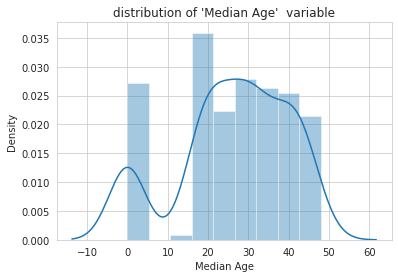

In [102]:
sns.distplot(df3['Median Age'])                                                              # Ploting the histogram and desity curve graph by using seborn library
sns.set_style("whitegrid")                            
plt.title("distribution of 'Median Age'  variable")                                          # adding the title to plot
plt.show

* data is partially evenly distributed
* by seeing above fig we can say that it is ditributed in bynomial manner because we replace N.A. values to 0.
* Japan has the highest median value
* most of the concentrated between 28 t0 48

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

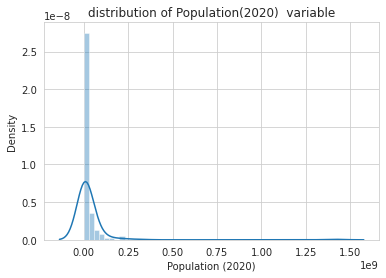

In [115]:
sns.distplot(df[0]['Population (2020)'])                      # Ploting the histogram and desity curve graph by using seborn library
sns.set_style("whitegrid")                            
plt.title("distribution of Population(2020)  variable")       # adding the title to plot
plt.show

* By seeing the above fig its is clear that only few countires hold maximum number of population.
* The data is also patialy Normaly distributed.
* we onserve negligible right skweens in the above plot. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

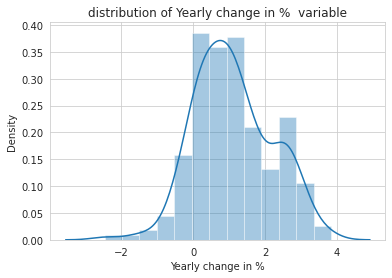

In [103]:
sns.distplot(df[0]['Yearly change in %'])                      # Ploting the histogram and desity curve graph by using seborn library
sns.set_style("whitegrid")                            
plt.title("distribution of Yearly change in %  variable")       # adding the title to plot
plt.show

* The data is patialy Normaly distributed.
* There is no skweenes in the plot on seeing the density curve.
* Average increase in the population is 0.9%
* Higest percentgae increase is 3.84%
* Lowest percentage Increase is -2.47%

In [96]:
df3 = df[0].replace('N.A.',0)                                                                  # Replacing the N.A. to 0 to get the result
df3

,Countries,Population (2020),Yearly change in %,Increased population,Density (people/Km²),Land Area (Km²),Migrants (net),Fertility Rate,Median Age,Urban Pop %,World Share
0,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47
1,India,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70
2,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38,83 %,4.25
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51
4,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23,35 %,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50,100,NaN,0,0,10 %,0.00
231,Falkland Islands,3480,3.05,103,0,12170,NaN,0,0,66 %,0.00
232,Niue,1626,0.68,11,6,260,NaN,0,0,46 %,0.00
233,Tokelau,1357,1.27,17,136,10,NaN,0,0,0 %,0.00


In [98]:
df3['Urban Pop %'] = df3['Urban Pop %'].str.replace('%','',regex = True).astype(float)        # correcting the required columns data types

In [109]:
df3['Median Age'] = df3['Median Age'].str.replace('.','',regex = True).astype(float)          # correcting the required columns data types

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

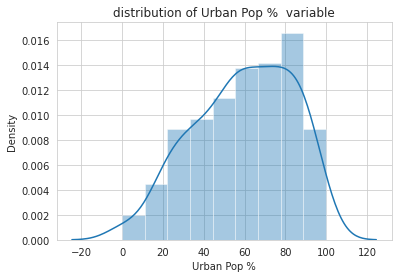

In [104]:
sns.distplot(df3['Urban Pop %'])                                                              # Ploting the histogram and desity curve graph by using seborn library
sns.set_style("whitegrid")                            
plt.title("distribution of Urban Pop %  variable")                                            # adding the title to plot
plt.show

* The data is  Normaly distributed.
* Observing the density curve  we can say that no skweenes in the plot.
* The above plot says that 72% of the world population in urban areas.
* 100% of the population live in the urban areas.




# Sorting the population column based on the lowest populated countries and report the bottom 10 countries as well as the top 10 countries.

In [90]:
sp = df[0].sort_values(by=['Population (2020)'])              # Sorting the Population column baesed on the lowest populated countires  
sp

,Countries,Population (2020),Yearly change in %,Increased population,Density (people/Km²),Land Area (Km²),Migrants (net),Fertility Rate,Median Age,Urban Pop %,World Share
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00
233,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00
232,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00
231,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00
230,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00
...,...,...,...,...,...,...,...,...,...,...,...
4,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83
3,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51
2,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25
1,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70


In [84]:
# soriting the data in Countries,Population (2020) Rate and arranging the data in descending order order
df[0][['Countries','Population (2020)']].sort_values(by=['Population (2020)','Countries'],ascending=True).head(10)

,Countries,Population (2020)
234,Holy See,801
233,Tokelau,1357
232,Niue,1626
231,Falkland Islands,3480
230,Montserrat,4992
229,Saint Pierre & Miquelon,5794
228,Saint Helena,6077
227,Saint Barthelemy,9877
226,Nauru,10824
225,Wallis & Futuna,11239


### Bottom ten countries based on the population column
* Holy see country has the lowest population.

In [83]:
# soriting the data in Countries,Population (2020) Rate and arranging the data in descending order order
df[0][['Countries','Population (2020)']].sort_values(by=['Population (2020)','Countries'],ascending=False).head(10)

,Countries,Population (2020)
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340
5,Brazil,212559417
6,Nigeria,206139589
7,Bangladesh,164689383
8,Russia,145934462
9,Mexico,128932753


### Top ten countries based on the population column
* China is the most populated country in the world.

# conclusion

* Pereformed the web scrapping by using the BeautifulSoup library.
* after performed the web scrapping retreived the data.
* retreived data is stored by using pandas data frame.
* Performed the data cleaning by using the pandas library.
* cheked the missing values .
* miss read data types are changed to correct data types.
* after conveting to correct data types performed some data visualisation and done some statistical operations.

# Part 2

In [137]:
class Student:                                                                                           # Creating a class
    def getstd(self, Stdname, No_of_enrolledstudents, OverallGPA):                                       # defining the function and assigning the variables
        Student.name=Stdname                                                                             # stroing the varibles in function                 
        Student.No_of_enrolledstudents =No_of_enrolledstudents
        Student.overallfpa= OverallGPA   
    
    def studentclass(self,name,Rollno,standared,math_marks,english_marks,science_marks,social_marks):    # creating a class giving variables in it.
        self.name=name
        self.rollno=Rollno
        self.standared=standared
        Student.marks.append(math_marks)
        Student.marks.append(english_marks)
        Student.marks.append(science_marks)
        Student.marks.append(social_marks)

    def __init__(standerd):                                                                             # using in it function defining the functiom    
     for i in standerd:                                                                                 # creating the for lop and iterating the function
      i= i+1                                                                                            # auto incrementing of i value  
      print(i)    

    def getname(self):                                                                                  # using get function defining values
         print  ('student name',self.name)                                                              # printing the required variables       
    def getrollno(self):   
        print ('rollnumber is', self.rollno)
    def getstd(self):    
        print ("standared ", self.standared)
        print ("Total Marks are: ", self.getgpa())
        print ("Average Marks are: ", self.getogpa())
        
    def getgpa(self):
        return (self.math_marks + self.english_marks +self.science_marks+self.social_marks)             # returning the values with summation of all the varibales     
    
    def getogpa(self):
        return ((self.math_marks + self.english_marks +self.science_marks+self.social_marks)/4)

Rollno= int (input("Enter the roll number: "))                                                          # taking the values form the user for roll number 
name = input("Enter the name: ")                                                                        # taking the values form the user for name   
standerd = int (input("Enter the standerd990: "))                                                       # taking the values form the user for standerd                              
math_marks = int (input("Enter the mathmarks: "))                                                       # taking the values form the user for math_marks    
english_marks = int (input("Enter the englishmarks: "))                                                 # taking the values form the user for emglish_marks            
science_marks = int (input("Enter the sciencemarks : "))                                                # taking the values form the user for science_marks 
social_marks = int (input("socialmarks: "))                                                             # taking the values form the user for social_marks

s1 = Student()                                                                                          # assigning the object
s1.studentclass(name,standerd,Rollno,math_marks,english_marks,science_marks,social_marks)               # defining the object variables
s1.getogpa